In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
from os.path import join as oj
import numpy as np
from copy import deepcopy
import pandas as pd
import data
import models
import pickle as pkl
from style import *
import viz

In [3]:
df = data.get_data(use_processed=True, dset='orig') # all_data=True
df = df[df['valid'] == 1] # exclude test cells, short/long tracks, hotspots
outcome = 'y_consec_thresh'

In [ ]:
viz.plot_curves(df, R=3, C=3, fig=True)
plt.savefig('figs/fig_traces.pdf')

# viz lifetime thresh plots

In [1]:
from data import *
df = get_tracks()  # note: different Xs can be different shapes
df['pid'] = np.arange(df.shape[0])  # assign each track a unique id
df['valid'] = True  # all tracks start as valid
df['valid'][df.cell_num.isin(cell_nums_test)] = False

In [2]:
print('\tpreprocessing data...')
df = remove_invalid_tracks(df)
df = add_features(df)
df = add_outcomes(df)

	preprocessing data...


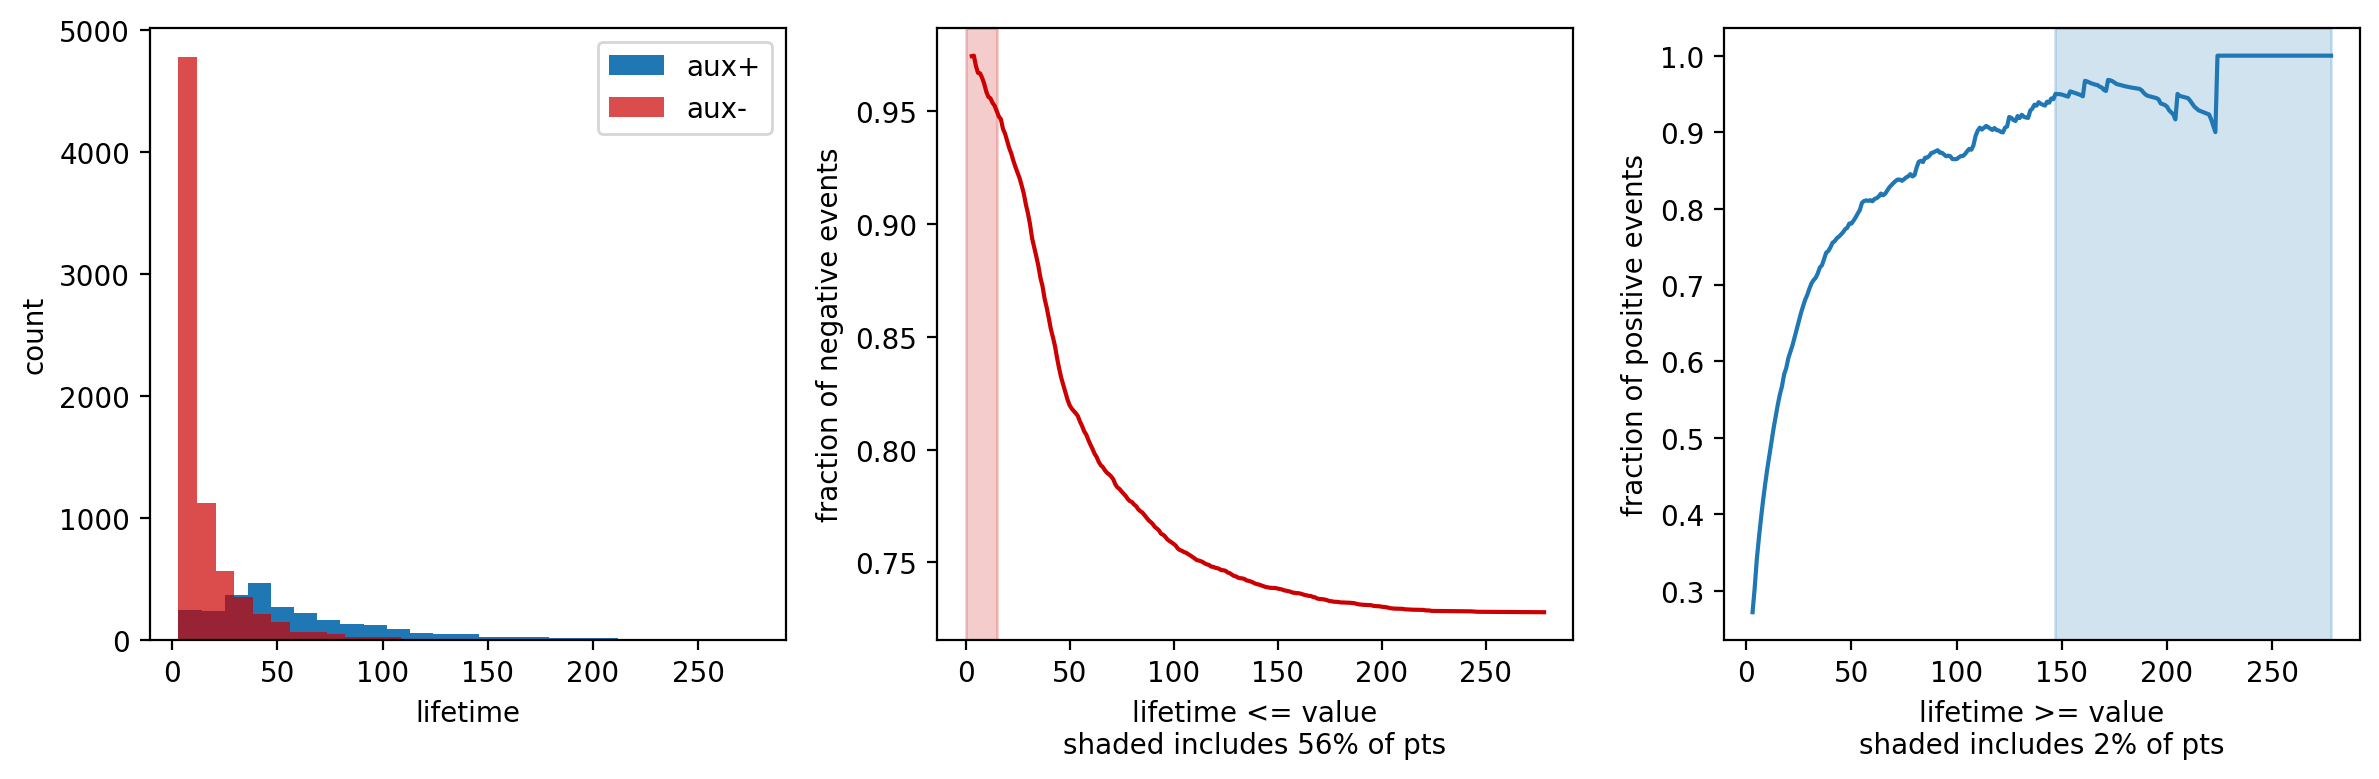

In [7]:
outcome_def='y_consec_thresh'
acc_thresh=0.95

_ = process_tracks_by_lifetime(df, outcome_def=outcome_def, plot=True, acc_thresh=acc_thresh)
plt.savefig('figs/fig_lifetime_thresh.pdf')